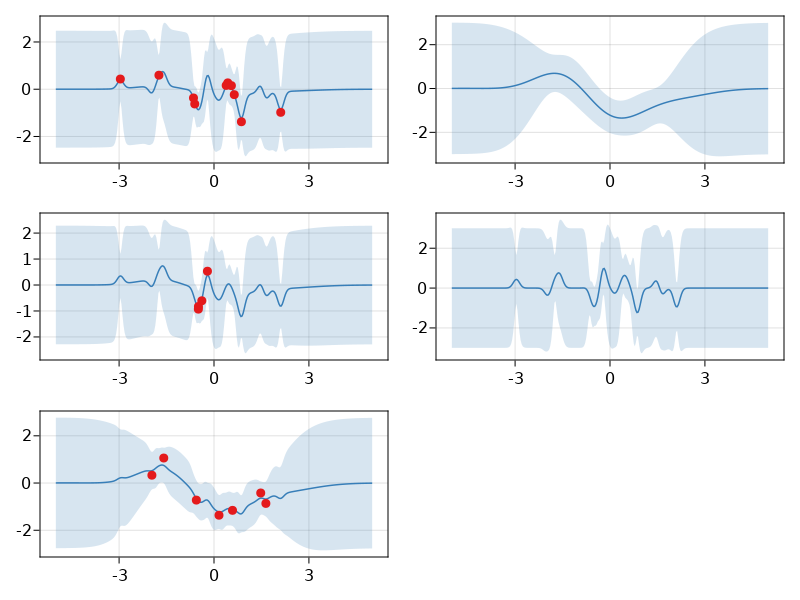

In [1]:
using AbstractGPs
using AbstractGPsMakie
using CairoMakie
using KernelFunctions
using LinearAlgebra
using Random
using Stheno

using CairoMakie.Makie.ColorSchemes: Set1_4

f = @gppp let
    f1 = GP(SEKernel())
    f2 = GP(with_lengthscale(SEKernel(), 0.1))
    g1 = 0.2 * f1 + 0.8 * f2
    g2 = 0.3 * f1 + 0.7 * f2
    g3 = 0.9 * f1 + 0.2 * f2
end;

rng = Xoshiro(123456);
x1 = randn(rng, 10);
x2 = randn(rng, 4);
x3 = randn(rng, 7);
x = BlockData(
    GPPPInput(:g1, x1),
    GPPPInput(:g2, x2),
    GPPPInput(:g3, x3),
);

σ²_noise = 0.1;
fx = f(x, σ²_noise);
y = rand(rng, fx);
y1, y2, y3 = split(x, y);

f_post = posterior(fx, y);


x_pred = range(-5.0, 5.0; length=300);


set_theme!(
    palette=(color=Set1_4,),
    patchcolor=(Set1_4[2], 0.2),
)

let
    fig = Figure();
    ax_g1 = Axis(fig[1, 1]);
    plot!(ax_g1, x_pred, f_post(GPPPInput(:g1, x_pred)); bandscale=3);
    scatter!(ax_g1, x1, y1);
    ax_g2 = Axis(fig[2, 1]);
    plot!(ax_g2, x_pred, f_post(GPPPInput(:g2, x_pred)); bandscale=3);
    scatter!(ax_g2, x2, y2);
    ax_g3 = Axis(fig[3, 1]);
    plot!(ax_g3, x_pred, f_post(GPPPInput(:g3, x_pred)); bandscale=3);
    scatter!(ax_g3, x3, y3);

    ax_f1 = Axis(fig[1, 2]);
    plot!(ax_f1, x_pred, f_post(GPPPInput(:f1, x_pred)); bandscale=3);
    ax_f2 = Axis(fig[2, 2]);
    plot!(ax_f2, x_pred, f_post(GPPPInput(:f2, x_pred)); bandscale=3);

    fig
end

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*